In [24]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
from scipy.stats import gamma
from scipy.stats import beta
from scipy.special import gamma as gamm
from matplotlib import pyplot as plt
from IPython.display import display
import sympy as sy

# Exericse 4.11
We find a 98\% Bayes credible interval (a, b) for $\theta$ with the property that $P(\theta \leq a) = P(\theta \geq b) = 0.01$ in each of the following cases. 
Note that we use numerical computation resources to do this. 

## Part 1
We assume that the posterior distribution is $P(\theta |\mathscr{D}) =\mathscr{N}(3, 7)$.
The following code gets our confidence interval.  

In [ ]:
a = norm.ppf(0.01, loc=3, scale=np.sqrt(7))
b = norm.ppf(0.99, loc=3, scale=np.sqrt(7))

print(repr((a, b)))


def pdf(x):

    return 1/np.sqrt(2*np.pi*7) * np.exp(-(x - 3)**2/(2*7))


print(quad(pdf, a, b))

(-3.1549379377358777, 9.154937937735877)
(0.9799999999999999, 1.1743905933906967e-09)


Which gives the confidence interval as $(a, b) = (-3.1549379377358777, 9.154937937735877)$.

# Part 2
We now assume the posterior is $\operatorname{Gamma}(1, 5)$

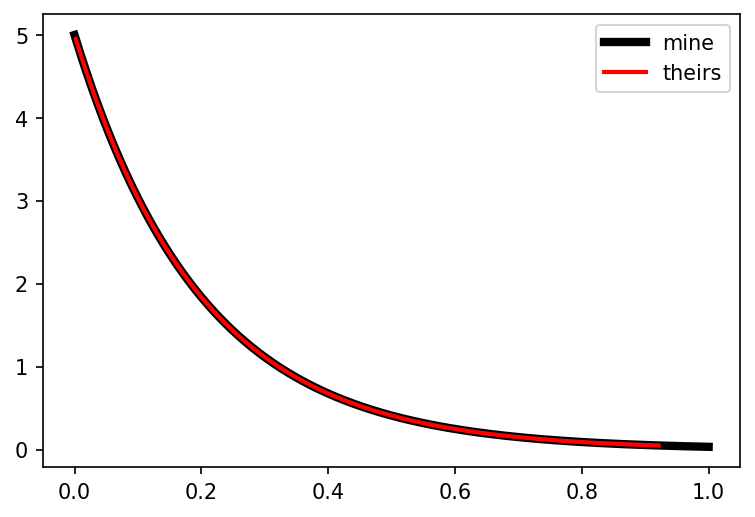

(0.0020100671707002876, 0.921034037197618)


(0.98, 1.0880185641326534e-14)

In [ ]:
alpha = 1
beta = 5

def pdf_gamma(x):

    return (beta**alpha * x**(alpha-1)*np.exp(-x*beta)) / gamm(alpha) 


a = gamma.ppf(0.01, alpha, scale=1/beta)
b = gamma.ppf(0.99, alpha, scale=1/beta)

x_my = np.linspace(0, 1, 1000)

x_theirs = np.linspace(a, b, 1000)


fig = plt.figure()
fig.set_dpi(150)
ax = fig.add_subplot(111)
ax.plot(x_my, pdf_gamma(x_my), 'k-', linewidth=4, label='mine')
ax.plot(x_theirs, gamma.pdf(x_theirs, alpha, scale=1/beta), 'r-', linewidth=2, label='theirs')
ax.legend(loc='best')
plt.show()

assert(np.allclose(pdf_gamma(x_theirs), gamma.pdf(x_theirs, alpha, scale=1/beta) ))

print(repr((a, b)))

display(quad(pdf_gamma, a, b))


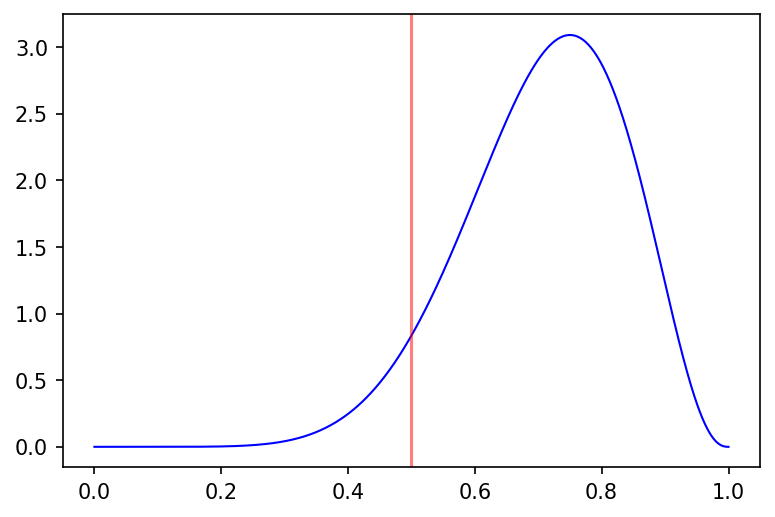

0.9359739535574458 0.9359739535574458 0.9359739535574458 7.108319093624318e-16
(0.4349045194982143, 0.9165182401698058)
(0.9499999999999997, 2.559506381263932e-12)


In [52]:
def pdf_beta(p):
    return gamm(12)*p**(15/2)*(1-p)**(5/2)/ (gamm(17/2) * gamm(7/2))



x = np.linspace(0, 1, 1000)
x1 = np.linspace(beta.ppf(0.01, 17/2, 7/2), beta.ppf(0.99, 17/2, 7/2), 1000)

fig = plt.figure()
fig.set_dpi(150)
ax = fig.add_subplot(111)

#ax.plot(x, pdf_beta(x), 'k-', linewidth=6)
ax.plot(x, beta.pdf(x, 17/2, 7/2), 'b-', linewidth=1)
ax.axvline(1/2, color='red', alpha=0.5)
#ax.plot(x1, beta.pdf(x1, 17/2, 7/2), 'b-', linewidth=2)

plt.show()

theirs_1 = 1 - beta.cdf(1/2, 17/2, 7/2)

theirs_2 = 1 - quad(beta.pdf, 0, 1/2, args=(17/2, 7/2))[0]

my, my_error = quad(pdf_beta, 0, 1/2)

my = 1- my

print(theirs_1, theirs_2, my, my_error)


a = beta.ppf(0.025, 17/2, 7/2)
b = beta.ppf(1.0 - 0.025, 17/2, 7/2)

print(repr((a, b)))

print(quad(pdf_beta, a, b))

